In [6]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)

from pygpudrive.env.config import EnvConfig, RenderConfig
from pygpudrive.env.dataset import SceneDataLoader
from pygpudrive.visualize.utils import bg_img_from_fig, img_from_fig

from pygpudrive.env.env_torch import GPUDriveTorchEnv
# Increase the resolution of the figure
#plt.rcParams['figure.dpi'] = 100  # Higher DPI for better resolution

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DYNAMICS_MODEL = "delta_local" # "delta_local" / "state" / "classic"
NUM_ENVS = 2

# Configs
render_config = RenderConfig(draw_obj_idx=True)
env_config = EnvConfig(dynamics_model=DYNAMICS_MODEL)

In [4]:
# Create data loader
train_loader = SceneDataLoader(
    root="data/processed/training",
    batch_size=NUM_ENVS,
    dataset_size=NUM_ENVS,
    sample_with_replacement=True,
)


env = GPUDriveTorchEnv(
    config=env_config,
    data_loader=train_loader,
    max_cont_agents=128,
    device="cpu",
    render_config=render_config,
    action_type="continuous" # "continuous" or "discrete"
)

env.reset();

In [7]:
# Plot a bird's eye view of the environment
figs = env.vis.plot_simulator_state(
    env_indices=[0],
    zoom_radius=100,
    #center_agent_indices=[1],
    time_steps=[0],
)

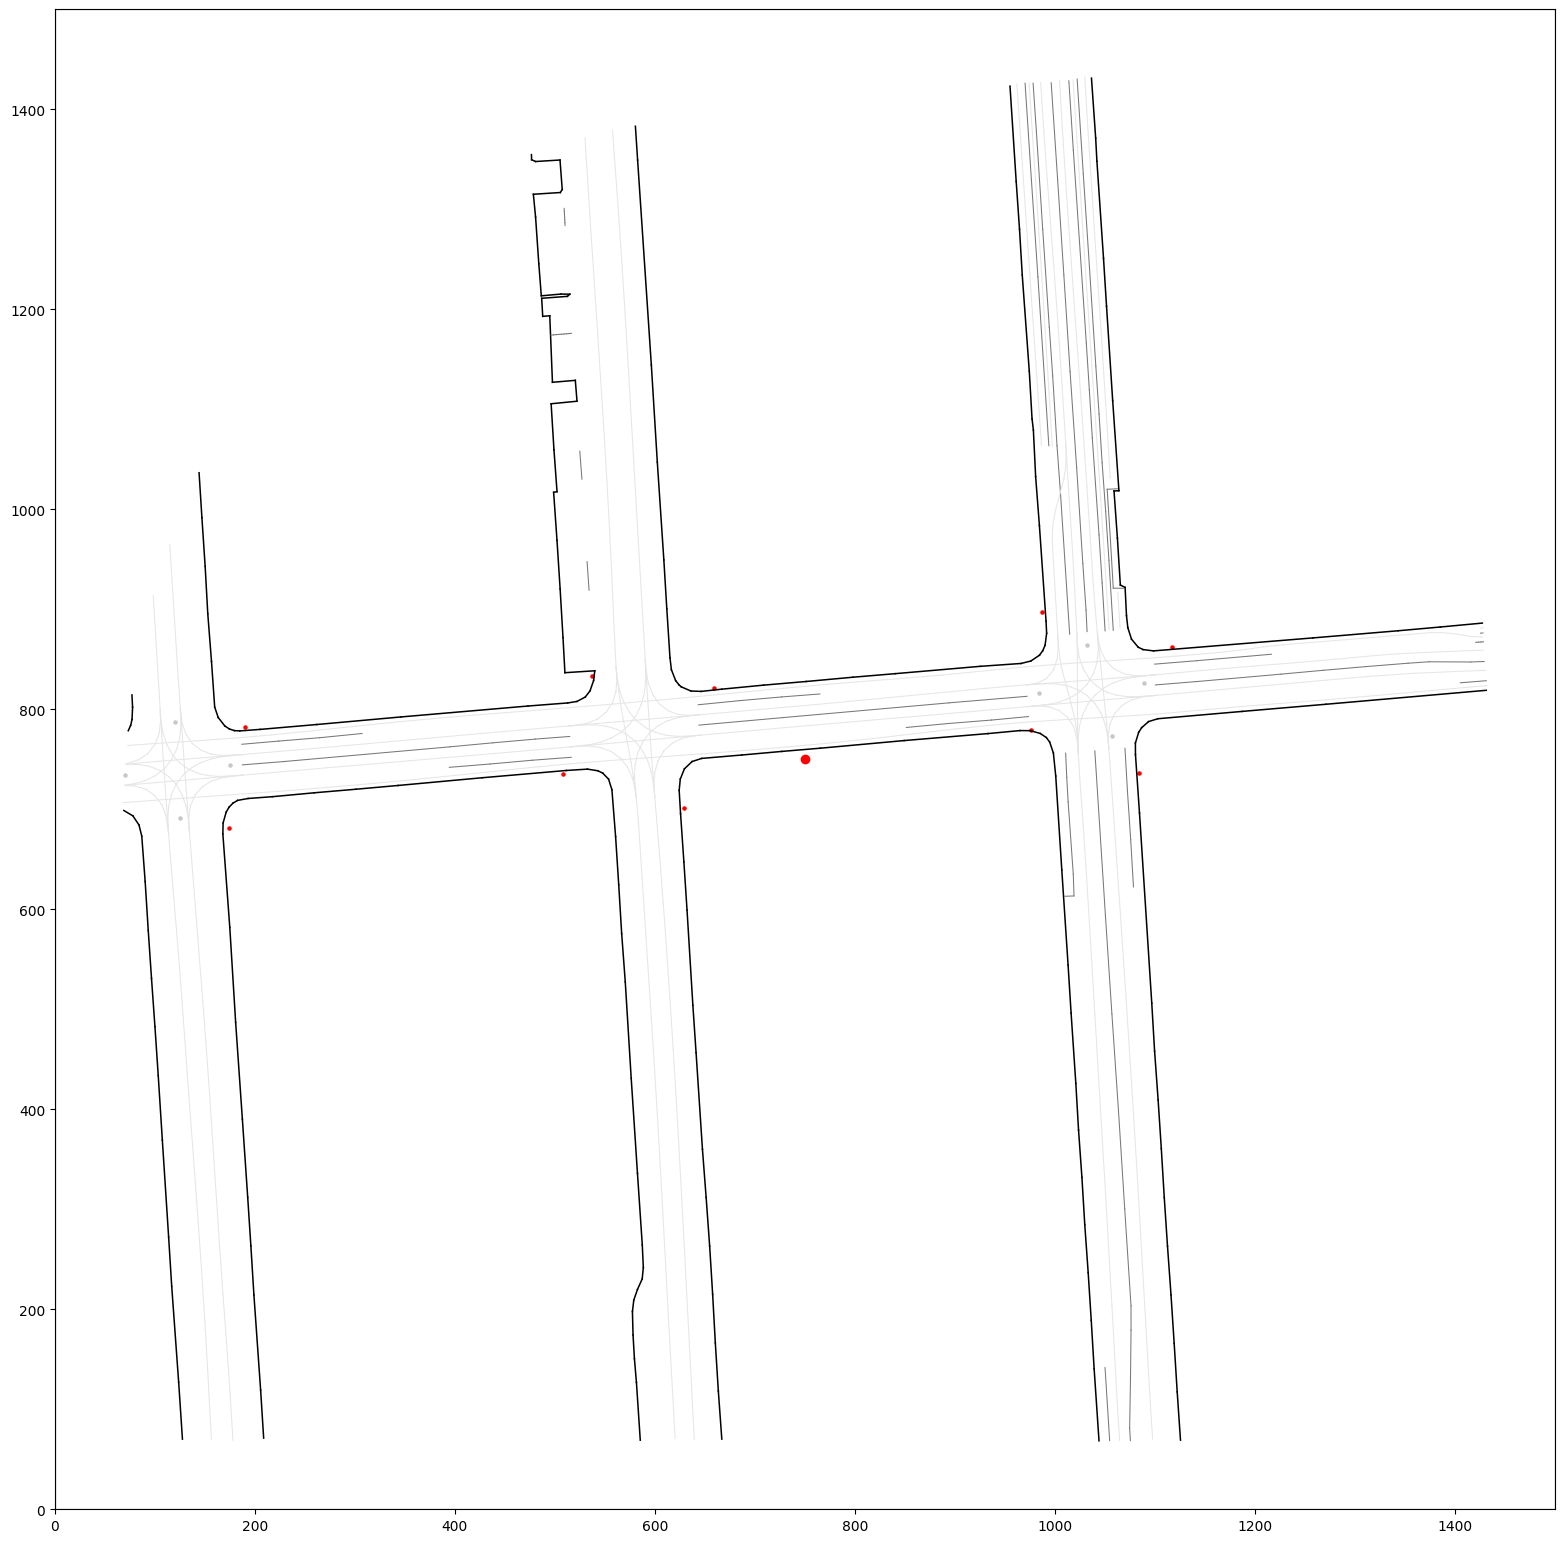

In [8]:
arr = bg_img_from_fig(env.vis.cached_roadgraphs[1])

# Create a figure with the exact dimensions of the image
fig = plt.figure(figsize=(arr.shape[1] / 100, arr.shape[0] / 100), dpi=100)
ax = fig.add_subplot(111)

# Display the image to fill the entire figure
ax.imshow(arr, extent=(0, arr.shape[1], 0, arr.shape[0]), origin='upper')
#ax.axis("off")  # Turn off the axes

# Now you can overlay additional elements on top of this
# Example: Draw a point at the center of the image
ax.plot(arr.shape[1] / 2, arr.shape[0] / 2, 'ro')  # Replace with actual overlay logic

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove any padding
plt.show()


In [10]:
# Plot a bird's eye view of the environment
figs = env.vis.plot_simulator_state(
    env_indices=[0],
    zoom_radius=100,
    #center_agent_indices=[1],
    time_steps=[0],
)

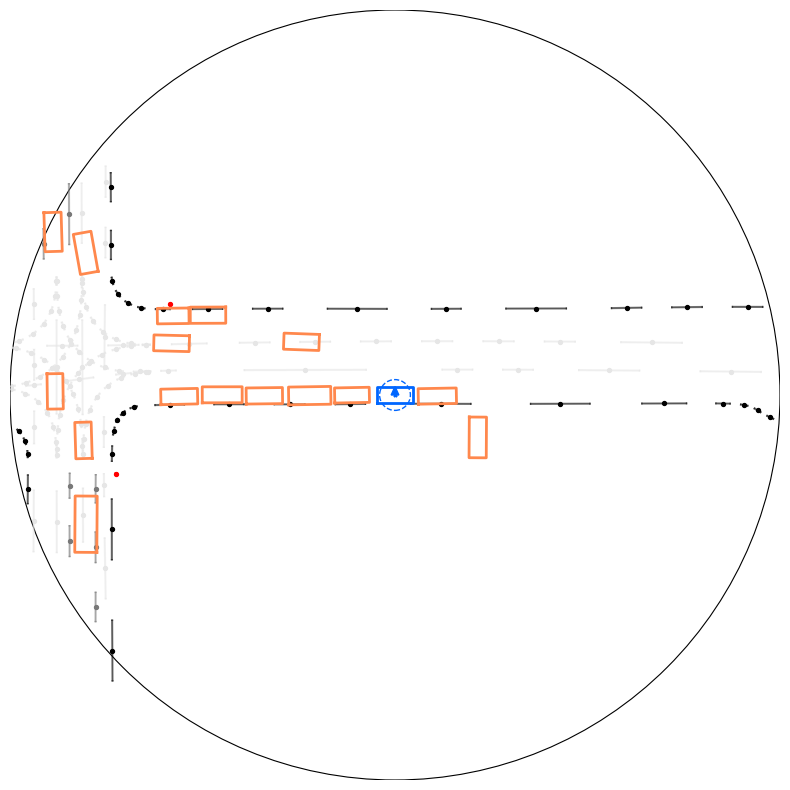

In [11]:
env.vis.plot_agent_observation(
    env_idx=1,
    agent_idx=8,
    figsize=(10, 10),
);